In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

In [3]:
# 1 Obtiene lista de nombres del archivo
nombres = np.genfromtxt("../data/raw/nombres_DATA.txt",dtype='U',delimiter=',')
nombres

# 2 lee archivo DATA que contiene datos experimentales
data = pd.read_csv('../data/raw/DATA.csv',names=nombres,index_col=0,parse_dates=True)
data = data.resample("600S").interpolate(method='time')
data.sort_index(inplace=True)

ruoa = pd.read_csv('../data/raw/RUOA.txt',skiprows=4,delimiter="\t",usecols=[0,1,2,3,4,9],
                   names=['tiempo','To','hr','ws','wd','Ig'],index_col=0,parse_dates=True)

ruoa.sort_index(inplace=True)
ruoa = ruoa.add_suffix("_ruoa")
ruoa = ruoa.resample("600S").interpolate(method='time')

esolmet = pd.read_excel('../data/raw/ESOLMET_2019.xlsx',skiprows=5,usecols=[0,1,2,3,5],
                       names=['tiempo','Ib','Ig','Id','To'],index_col=0,parse_dates=True)
esolmet.sort_index(inplace=True)
esolmet = esolmet.add_suffix("_esolmet")


datos = pd.concat([ruoa,esolmet,data],axis=1)

In [4]:
datos.to_csv("../data/processed/mediciones.csv")

In [5]:
def importa(archivo,nombres):
    tmp = pd.read_csv(archivo,skiprows=1,names=nombres)
    tmp.tiempo = tmp.tiempo.str.replace("24:00:00","23:59:59")
    tmp.tiempo = "2019-" + tmp.tiempo
    tmp.tiempo = pd.to_datetime(tmp.tiempo,format="%Y- %m/%d %H:%M:%S")
    tmp.set_index('tiempo',inplace=True)
    return tmp


# Zyanya y Alejandro

In [6]:
archivo  = "../data/raw/za.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype='U')
for i,nombre in enumerate(nombres):
    print(i,nombre)

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[3] = 'ws'
nombres[4] = 'wd'
nombres[5] = 'Id'
nombres[6] = 'Ib'
nombres[7] = 'alpha'
nombres[8] = 'Ti'
za = importa(archivo,nombres)

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 Environment:Site Outdoor Air Relative Humidity [%](TimeStep)
3 Environment:Site Wind Speed [m/s](TimeStep)
4 Environment:Site Wind Direction [deg](TimeStep)
5 Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep)
6 Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)
7 Environment:Site Solar Altitude Angle [deg](TimeStep)
8 CR:Zone Mean Air Temperature [C](TimeStep)
9 CR:AFN Zone Infiltration Air Change Rate [ach](Hourly)


In [7]:
za.index

DatetimeIndex(['2019-05-03 00:10:00', '2019-05-03 00:20:00',
               '2019-05-03 00:30:00', '2019-05-03 00:40:00',
               '2019-05-03 00:50:00', '2019-05-03 01:00:00',
               '2019-05-03 01:10:00', '2019-05-03 01:20:00',
               '2019-05-03 01:30:00', '2019-05-03 01:40:00',
               ...
               '2019-06-24 22:30:00', '2019-06-24 22:40:00',
               '2019-06-24 22:50:00', '2019-06-24 23:00:00',
               '2019-06-24 23:10:00', '2019-06-24 23:20:00',
               '2019-06-24 23:30:00', '2019-06-24 23:40:00',
               '2019-06-24 23:50:00', '2019-06-24 23:59:59'],
              dtype='datetime64[ns]', name='tiempo', length=7632, freq=None)

In [8]:
za.to_csv("../data/processed/C_za.csv")

# Astrid y E Spezzia

In [9]:
archivo = "../data/raw/ae.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype='U')
for i,nombre in enumerate(nombres):
    print(i,nombre)

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[4] = 'ws'
nombres[5] = 'wd'
nombres[6] = 'Id'
nombres[7] = 'Ib'
nombres[8] = 'alpha'
nombres[13] = 'Ti'

ae = importa(archivo,nombres)
# ae.columns

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 Environment:Site Outdoor Air Relative Humidity [%](TimeStep)
3 Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)
4 Environment:Site Wind Speed [m/s](TimeStep)
5 Environment:Site Wind Direction [deg](TimeStep)
6 Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep)
7 Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)
8 Environment:Site Solar Altitude Angle [deg](TimeStep)
9 C_ROJAS:Zone Electric Equipment Electric Power [W](TimeStep)
10 C_ROJAS:Zone Electric Equipment Total Heating Rate [W](TimeStep)
11 C_1:Zone Mean Air Temperature [C](TimeStep)
12 C_2:Zone Mean Air Temperature [C](TimeStep)
13 C_ROJAS:Zone Mean Air Temperature [C](TimeStep)
14 T_1:Zone Mean Air Temperature [C](TimeStep)
15 T_2:Zone Mean Air Temperature [C](TimeStep)
16 T_ROJAS:Zone Mean Air Temperature [C](TimeStep)


In [10]:
ae = ae.resample("600S").interpolate(method="time")
ae.index

DatetimeIndex(['2019-06-08 00:00:00', '2019-06-08 00:10:00',
               '2019-06-08 00:20:00', '2019-06-08 00:30:00',
               '2019-06-08 00:40:00', '2019-06-08 00:50:00',
               '2019-06-08 01:00:00', '2019-06-08 01:10:00',
               '2019-06-08 01:20:00', '2019-06-08 01:30:00',
               ...
               '2019-06-24 22:20:00', '2019-06-24 22:30:00',
               '2019-06-24 22:40:00', '2019-06-24 22:50:00',
               '2019-06-24 23:00:00', '2019-06-24 23:10:00',
               '2019-06-24 23:20:00', '2019-06-24 23:30:00',
               '2019-06-24 23:40:00', '2019-06-24 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=2448, freq='600S')

In [11]:
ae.to_csv("../data/processed/C_ae.csv")

# Benita y Medel

In [12]:
archivo = "../data/raw/bm.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype='U')
for i,nombre in enumerate(nombres):
    print(i,nombre)

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[4] = 'ws'
nombres[5] = 'wd'
nombres[6] = 'Id'
nombres[7] = 'Ib'
nombres[8] = 'alpha'
nombres[9] = 'Ti'

bm = importa(archivo,nombres)
# bm.columns

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 Environment:Site Outdoor Air Relative Humidity [%](TimeStep)
3 Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)
4 Environment:Site Wind Speed [m/s](TimeStep)
5 Environment:Site Wind Direction [deg](TimeStep)
6 Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep)
7 Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)
8 Environment:Site Solar Altitude Angle [deg](TimeStep)
9 ZT3:Zone Mean Air Temperature [C](TimeStep)


In [13]:
bm = bm.resample("600S").interpolate(method='time')
bm.index

DatetimeIndex(['2019-05-21 00:00:00', '2019-05-21 00:10:00',
               '2019-05-21 00:20:00', '2019-05-21 00:30:00',
               '2019-05-21 00:40:00', '2019-05-21 00:50:00',
               '2019-05-21 01:00:00', '2019-05-21 01:10:00',
               '2019-05-21 01:20:00', '2019-05-21 01:30:00',
               ...
               '2019-06-24 22:20:00', '2019-06-24 22:30:00',
               '2019-06-24 22:40:00', '2019-06-24 22:50:00',
               '2019-06-24 23:00:00', '2019-06-24 23:10:00',
               '2019-06-24 23:20:00', '2019-06-24 23:30:00',
               '2019-06-24 23:40:00', '2019-06-24 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=5040, freq='600S')

In [14]:
bm.to_csv("../data/processed/C_bm.csv")

# Carmona y Augusto

In [15]:
archivo  = "../data/raw/ca.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype='U')
# for i,nombre in enumerate(nombres):
#     print(i,nombre)

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[3] = 'ws'
nombres[4] = 'wd'
nombres[5] = 'Id'
nombres[6] = 'Ib'
nombres[7] = 'alpha'
nombres[8] = 'Ti'

ca = importa(archivo,nombres)
# ca.columns

In [16]:
ca = ca.resample("600S").interpolate(method='time')
ca.index

DatetimeIndex(['2019-05-25 00:00:00', '2019-05-25 00:10:00',
               '2019-05-25 00:20:00', '2019-05-25 00:30:00',
               '2019-05-25 00:40:00', '2019-05-25 00:50:00',
               '2019-05-25 01:00:00', '2019-05-25 01:10:00',
               '2019-05-25 01:20:00', '2019-05-25 01:30:00',
               ...
               '2019-06-23 22:20:00', '2019-06-23 22:30:00',
               '2019-06-23 22:40:00', '2019-06-23 22:50:00',
               '2019-06-23 23:00:00', '2019-06-23 23:10:00',
               '2019-06-23 23:20:00', '2019-06-23 23:30:00',
               '2019-06-23 23:40:00', '2019-06-23 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=4320, freq='600S')

In [17]:
ca.to_csv("../data/processed/C_ca.csv")

# Gr'aficas

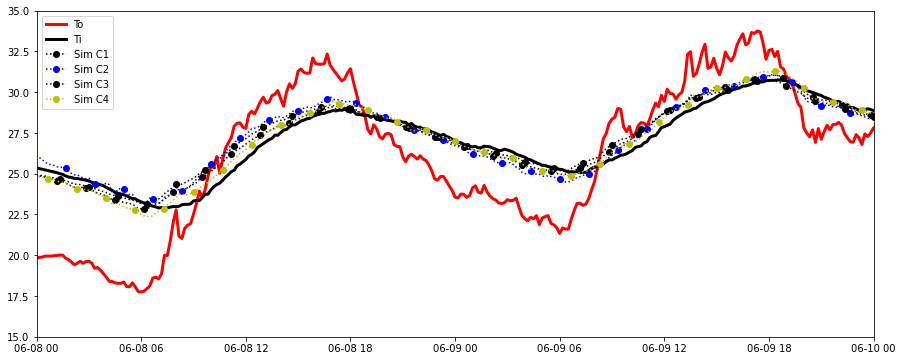

In [19]:
fig, ax  = plt.subplots(figsize=(15,6),sharex=True)
fecha1 = parse("2019-06-08")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(15,35)

ax.plot(datos.To_esolmet,'r-',lw=3,label='To')
ax.plot(datos.Ti,        'k-',lw=3,label='Ti')


ax.plot(za.Ti,'ko:',label="Sim C1",markevery=10)
ax.plot(ae.Ti,'bo:',label="Sim C2",markevery=10)
ax.plot(bm.Ti,'ko:',label="Sim C3",markevery=10)
ax.plot(ca.Ti,'yo:',label="Sim C4",markevery=10)

ax.legend()

#  Actividades
## * Importar datos experimentales y numéricos [data cleaning]
## * Visualización de series temporales
## * Uso de métricas para seleccionar mejor conjunto de datos experimentales
## * Uso de clases
## * Seleccionar el mejor conjunto de datos



# Comparación de datos experimentales y simulados: Selección del mejor conjunto de datos simulados

## Guillermo Barrios del Valle